**1. IMPORTING ESSENTIAL LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
from google.colab import files #library to upload files to colab notebook
%matplotlib inline

**2. SETTING UP DATASET FOLDER**

In [4]:
#Saving dataset in a folder and switching to the directory containing the dataset
%cd /content/drive/My Drive/Healthcare AI Datasets/Brain_MRI

/content/drive/My Drive/Healthcare AI Datasets/Brain_MRI


**3. LOADING THE DATASET**

In [5]:
brain_df = pd.read_csv("data_mask.csv")

In [6]:
#Getting an insight of the data
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


**Column Info**

patient_id : signifies the patient's ID

image_path : signifies the path of the Brain MRI of the patient

mask_path : signifies the path to the Masked image. A masked image is the image obtained after image segmentation. Image segmentation classifies an image on the pixel level. Each pixel is associated with a certain class. 

mask : binary value. 0-brain tumour absent 1-brain tumour present

In [7]:
#Having a first look at our data
brain_df.head()

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0


In [8]:
# Checking if the data is balanced
brain_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

**4. Vizuallization in action**

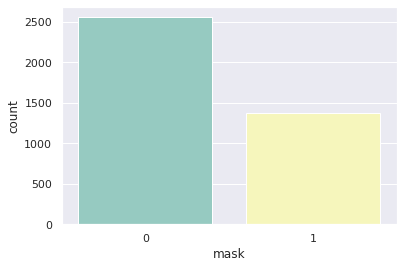

In [9]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="mask", data=brain_df, palette = "Set3")

/content/drive/My Drive/Healthcare AI Datasets/Brain_MRI
True
TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_5_mask.tif
<class 'numpy.ndarray'>


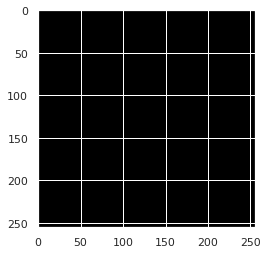

In [12]:
#Being sure the path exists and displaying the image 
import os
print(os.getcwd())
print(os.path.exists(os.getcwd() +'/'+brain_df.mask_path[444]))
print(brain_df.mask_path[444])
img = cv2.imread(brain_df.mask_path[444])
print(type(img))
plt.imshow(img)
#plt.imshow(cv2.imread('TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'))

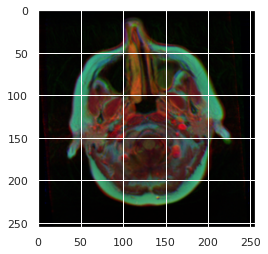

In [13]:
plt.imshow(cv2.imread(brain_df.image_path[444]))

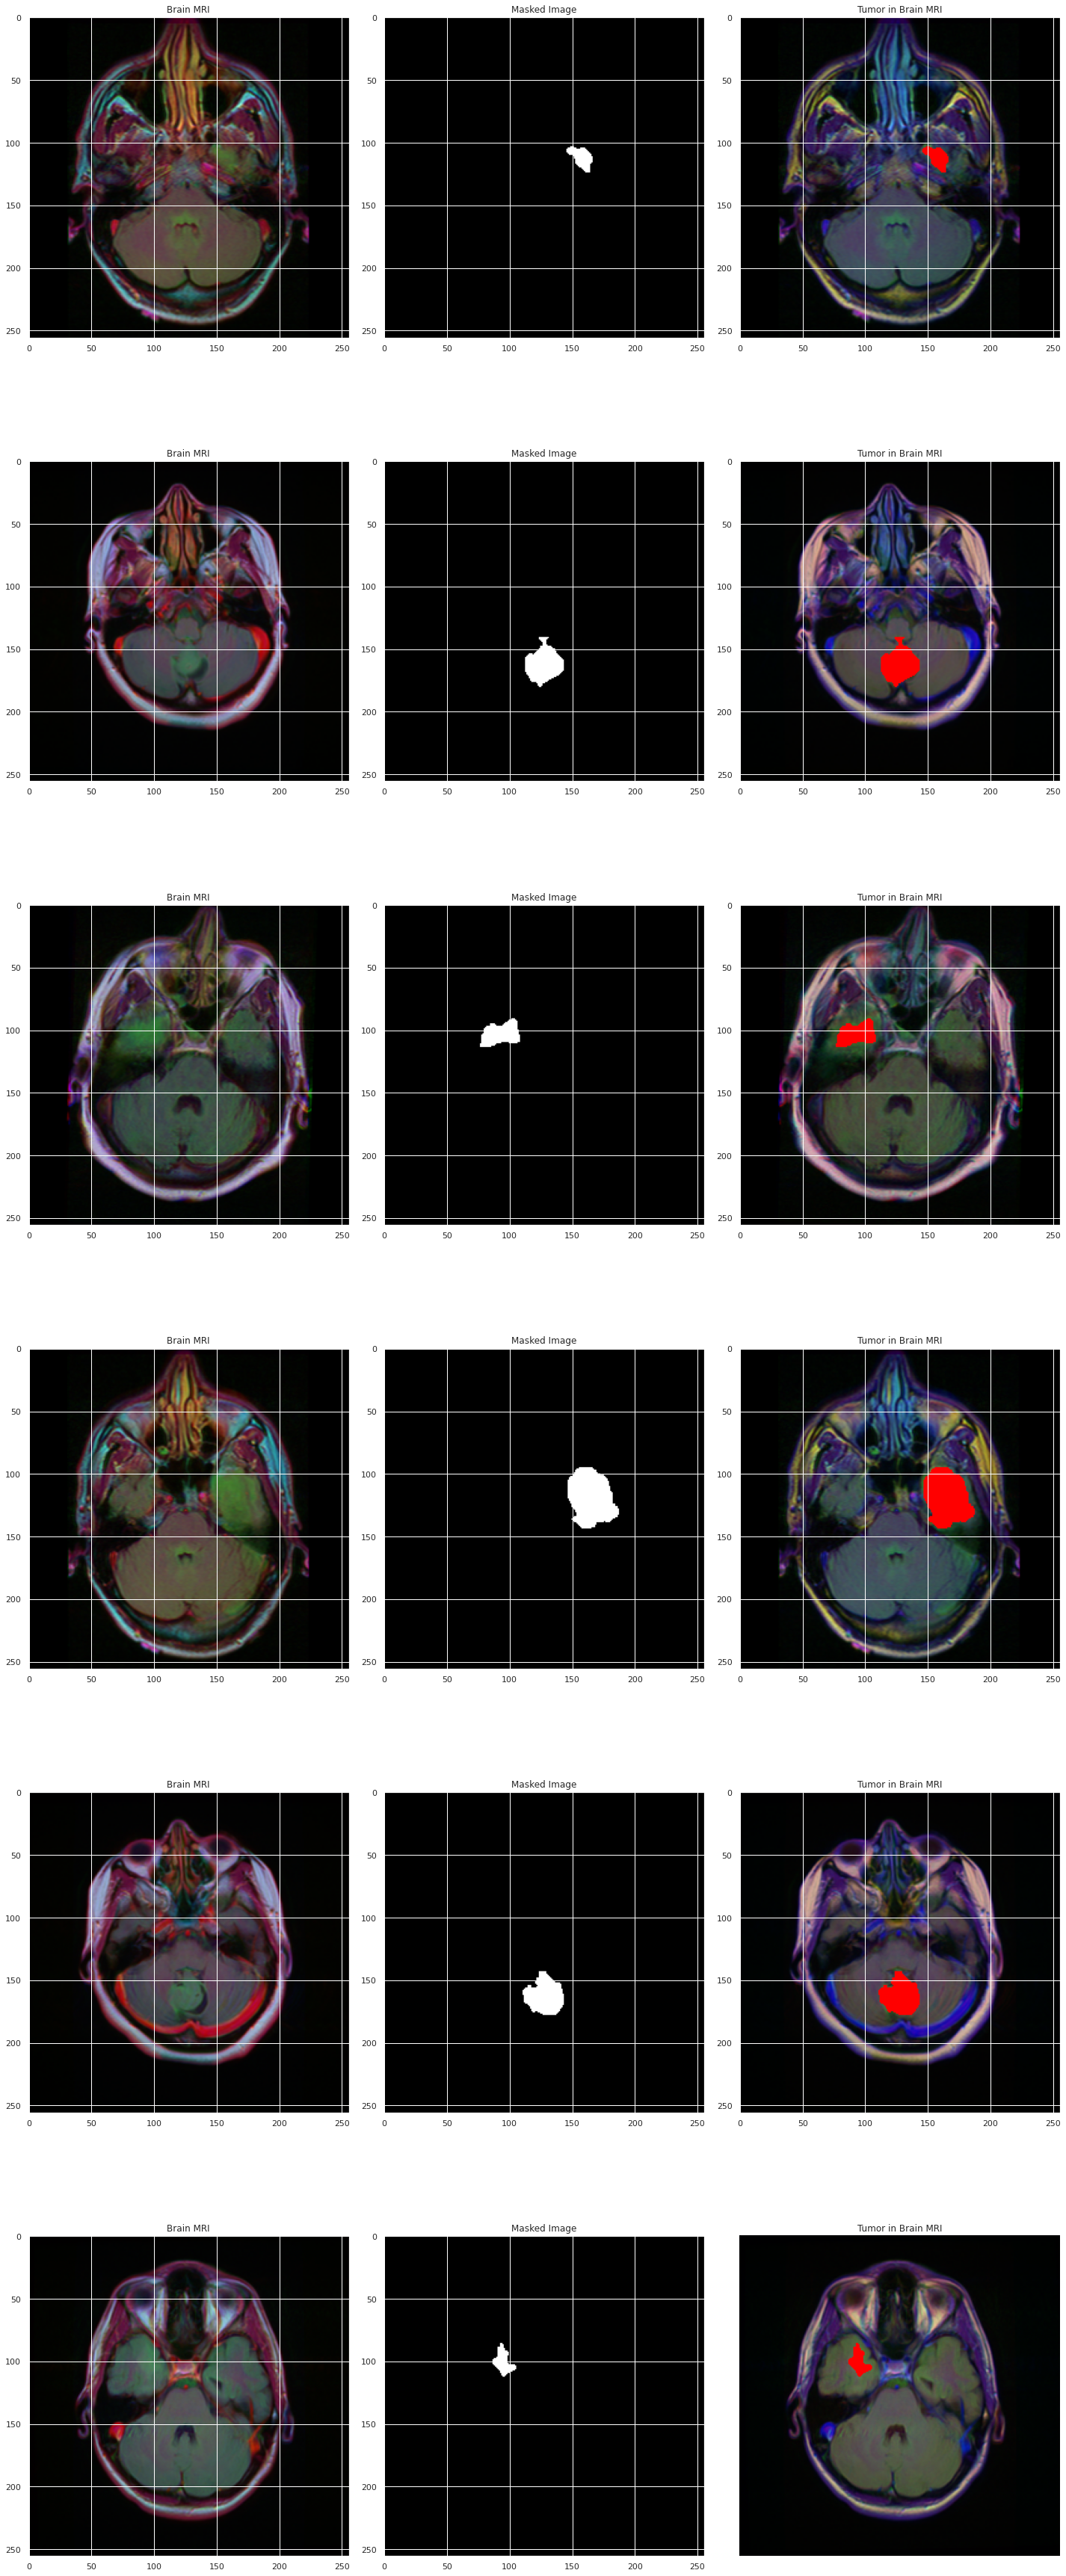

In [40]:
#Printing few random brain tumour MRIs having a mask value of 1
import random
fig,axes = plt.subplots(nrows = 6, ncols = 3, figsize = (20,50))
plt.grid(None)
plt.axis('Off')
row = 0
for i in range(len(brain_df)):
  if brain_df['mask'][i] == 1 and row < 6:
    img = io.imread(brain_df.image_path[i])
    axes[row][0].title.set_text("Brain MRI")
    axes[row][0].imshow(cv2.imread(brain_df.image_path[i]))

    mask = io.imread(brain_df.mask_path[i])
    axes[row][1].title.set_text("Masked Image")
    axes[row][1].imshow(cv2.imread(brain_df.mask_path[i]))

    img[mask == 255] = (255,0,0) #Marking the tumour area in red
    axes[row][2].title.set_text("Tumor in Brain MRI")
    axes[row][2].imshow(img)
    row += 1

fig.tight_layout()